<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/14_(sat)_January_03_00am_SVR_with_linear_Data_C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filename_a='/content/drive/MyDrive/machine_learning/C_NIR_DATA_csv.csv'
import pandas as pd
data_a = pd.read_csv(filename_a,header=0, 
                   encoding="unicode-escape")

In [3]:
xx,yy=data_a.shape
xx

596

In [4]:
data_a2=data_a.iloc[0::,1:yy+1]
data_a2.head()

,¸ðµ¨ Æ÷ÇÔ,Y_C,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,True,13.7,0.275573,0.276255,0.277041,0.276786,0.276141,0.275785,0.275601,0.275486,...,2.951816,2.951513,2.943587,2.938735,2.943676,2.945165,2.934662,2.927990,2.933237,2.935392
1,True,13.7,0.267852,0.268512,0.269218,0.268729,0.267901,0.267559,0.267297,0.266783,...,2.971480,2.976221,2.967798,2.960853,2.963925,2.963556,2.951274,2.938635,2.938295,2.936243
2,True,13.7,0.255554,0.256688,0.257757,0.257284,0.256349,0.256152,0.256369,0.256413,...,2.970865,2.972623,2.962654,2.953213,2.955619,2.959005,2.948674,2.938407,2.937494,2.935717
3,True,14.0,0.261500,0.262497,0.263683,0.263337,0.262394,0.262080,0.262105,0.261908,...,2.966876,2.969050,2.956999,2.946605,2.948800,2.954062,2.944920,2.933199,2.932310,2.932233
4,True,14.0,0.255863,0.256474,0.257499,0.257194,0.256181,0.255774,0.256080,0.256470,...,2.966953,2.966520,2.955803,2.951290,2.957556,2.961537,2.949925,2.941067,2.944744,2.946329


In [5]:
import multiprocessing
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [6]:
ai=[]
for i in range(xx):
    if data_a2.iloc[i,0]==False:
        ai.append(i)
data_a3=data_a2.drop(ai,axis=0) #
data_a3
len(ai)
data_a3

,¸ðµ¨ Æ÷ÇÔ,Y_C,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,True,13.7,0.275573,0.276255,0.277041,0.276786,0.276141,0.275785,0.275601,0.275486,...,2.951816,2.951513,2.943587,2.938735,2.943676,2.945165,2.934662,2.927990,2.933237,2.935392
1,True,13.7,0.267852,0.268512,0.269218,0.268729,0.267901,0.267559,0.267297,0.266783,...,2.971480,2.976221,2.967798,2.960853,2.963925,2.963556,2.951274,2.938635,2.938295,2.936243
2,True,13.7,0.255554,0.256688,0.257757,0.257284,0.256349,0.256152,0.256369,0.256413,...,2.970865,2.972623,2.962654,2.953213,2.955619,2.959005,2.948674,2.938407,2.937494,2.935717
3,True,14.0,0.261500,0.262497,0.263683,0.263337,0.262394,0.262080,0.262105,0.261908,...,2.966876,2.969050,2.956999,2.946605,2.948800,2.954062,2.944920,2.933199,2.932310,2.932233
4,True,14.0,0.255863,0.256474,0.257499,0.257194,0.256181,0.255774,0.256080,0.256470,...,2.966953,2.966520,2.955803,2.951290,2.957556,2.961537,2.949925,2.941067,2.944744,2.946329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,True,32.4,0.135276,0.137610,0.140914,0.140053,0.136916,0.136157,0.137090,0.135747,...,2.972613,2.971403,2.958870,2.953819,2.958890,2.961540,2.946616,2.937330,2.938951,2.940291
592,True,32.4,0.137936,0.140017,0.142949,0.142035,0.138991,0.138004,0.138435,0.136726,...,2.943456,2.949011,2.942728,2.932982,2.932143,2.930411,2.918988,2.912270,2.914247,2.914833
593,True,32.1,0.155206,0.157314,0.160477,0.159783,0.156933,0.156270,0.157146,0.155810,...,3.026505,3.024793,3.014496,3.004638,3.003242,2.996760,2.983829,2.973830,2.975724,2.970771
594,True,32.1,0.151214,0.153485,0.156378,0.155283,0.152194,0.151318,0.151877,0.150316,...,3.008188,3.006203,2.995358,2.985339,2.987618,2.992405,2.987275,2.979156,2.979178,2.975309


In [7]:
x1,y1=data_a3.shape
data_a1=data_a3.iloc[0::,2:yy+1]
data_a1

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,0.275573,0.276255,0.277041,0.276786,0.276141,0.275785,0.275601,0.275486,0.275550,0.274192,...,2.951816,2.951513,2.943587,2.938735,2.943676,2.945165,2.934662,2.927990,2.933237,2.935392
1,0.267852,0.268512,0.269218,0.268729,0.267901,0.267559,0.267297,0.266783,0.266419,0.264946,...,2.971480,2.976221,2.967798,2.960853,2.963925,2.963556,2.951274,2.938635,2.938295,2.936243
2,0.255554,0.256688,0.257757,0.257284,0.256349,0.256152,0.256369,0.256413,0.256452,0.255233,...,2.970865,2.972623,2.962654,2.953213,2.955619,2.959005,2.948674,2.938407,2.937494,2.935717
3,0.261500,0.262497,0.263683,0.263337,0.262394,0.262080,0.262105,0.261908,0.261728,0.260385,...,2.966876,2.969050,2.956999,2.946605,2.948800,2.954062,2.944920,2.933199,2.932310,2.932233
4,0.255863,0.256474,0.257499,0.257194,0.256181,0.255774,0.256080,0.256470,0.256531,0.254780,...,2.966953,2.966520,2.955803,2.951290,2.957556,2.961537,2.949925,2.941067,2.944744,2.946329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0.135276,0.137610,0.140914,0.140053,0.136916,0.136157,0.137090,0.135747,0.133233,0.133107,...,2.972613,2.971403,2.958870,2.953819,2.958890,2.961540,2.946616,2.937330,2.938951,2.940291
592,0.137936,0.140017,0.142949,0.142035,0.138991,0.138004,0.138435,0.136726,0.133999,0.133482,...,2.943456,2.949011,2.942728,2.932982,2.932143,2.930411,2.918988,2.912270,2.914247,2.914833
593,0.155206,0.157314,0.160477,0.159783,0.156933,0.156270,0.157146,0.155810,0.153363,0.153171,...,3.026505,3.024793,3.014496,3.004638,3.003242,2.996760,2.983829,2.973830,2.975724,2.970771
594,0.151214,0.153485,0.156378,0.155283,0.152194,0.151318,0.151877,0.150316,0.147899,0.147779,...,3.008188,3.006203,2.995358,2.985339,2.987618,2.992405,2.987275,2.979156,2.979178,2.975309


In [8]:
data_a1_n=data_a1.to_numpy()
data_a1_input=data_a1_n
data_a1_input

array([[0.27557253, 0.2762548 , 0.27704053, ..., 2.92798956, 2.93323714,
        2.93539235],
       [0.2678517 , 0.26851152, 0.26921755, ..., 2.93863485, 2.93829515,
        2.93624332],
       [0.25555381, 0.25668817, 0.25775731, ..., 2.93840655, 2.93749385,
        2.93571684],
       ...,
       [0.1552058 , 0.15731428, 0.16047743, ..., 2.97383025, 2.9757238 ,
        2.97077119],
       [0.15121435, 0.15348471, 0.15637839, ..., 2.97915567, 2.9791782 ,
        2.97530898],
       [0.13738812, 0.13965845, 0.14291282, ..., 2.96171401, 2.96157269,
        2.95829893]])

In [9]:
data_a1_output=data_a3.iloc[0::,1:2]
data_a1_output.head()

,Y_C
0,13.7
1,13.7
2,13.7
3,14.0
4,14.0


In [10]:
data_a1_output_n=data_a1_output.to_numpy().flatten()
data_a1_target=data_a1_output_n
data_a1_target

array([13.7 , 13.7 , 13.7 , 14.  , 14.  , 14.  , 14.  , 14.  , 14.  ,
       14.2 , 14.2 , 14.2 , 14.6 , 14.6 , 14.6 , 13.2 , 13.2 , 13.2 ,
       15.1 , 15.1 , 15.1 , 12.2 , 12.2 , 12.2 , 14.6 , 14.6 , 14.6 ,
       12.5 , 12.5 , 12.5 , 13.4 , 13.4 , 13.4 , 14.3 , 14.3 , 14.3 ,
       11.7 , 11.7 , 11.7 , 12.6 , 12.6 , 12.6 ,  6.1 ,  6.1 ,  6.1 ,
        5.1 ,  5.1 ,  5.1 ,  5.7 ,  5.7 ,  5.7 ,  5.  ,  5.  ,  5.  ,
        6.1 ,  6.1 ,  6.1 ,  5.2 ,  5.2 ,  5.2 ,  6.1 ,  6.1 ,  6.1 ,
        5.7 ,  5.7 ,  5.7 ,  5.3 ,  5.3 ,  5.3 ,  5.5 ,  5.5 ,  5.5 ,
        5.1 ,  5.1 ,  5.1 ,  4.8 ,  4.8 ,  4.8 ,  5.7 ,  5.7 ,  5.7 ,
        5.4 ,  5.4 ,  5.4 , 23.4 , 23.4 , 23.4 , 24.3 , 24.3 , 24.3 ,
       24.3 , 24.3 , 24.3 , 23.9 , 23.9 , 23.9 , 24.5 , 24.5 , 24.5 ,
       23.2 , 23.2 , 23.2 , 25.4 , 25.4 , 25.4 , 21.4 , 21.4 , 21.4 ,
       24.8 , 24.8 , 24.8 , 21.8 , 21.8 , 21.8 , 22.7 , 22.7 , 22.7 ,
       24.  , 24.  , 24.  , 20.8 , 20.8 , 20.8 , 22.3 , 22.3 , 22.3 ,
       12.7 , 12.7 ,

In [11]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [12]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE


#SVM을 사용한 분류모델 
# 커널기법

In [13]:
#X,y = load_boston(return_X_y=True)
X=data_a1_input
y=data_a1_target
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("힉습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

힉습 데이터 점수:-0.06329327817670971
평가 데이터 점수:-0.08630847888139415


# 시작 아님

In [ ]:
#no
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("힉습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#커널기법

In [ ]:
#no
X,y=load_boston(return_X_y=True)
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=123)

linear_svr=SVR(kernel='linear')
linear_svr.fit(X_train,y_train)

print("Linear SVR 힉습 데이터 점수:{}".format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수:{}".format(linear_svr.score(X_test, y_test)))

poly_svr=SVR(kernel='poly')
poly_svr.fit(X_train,y_train)

print("Polynomial SVR 힉습 데이터 점수:{}".format(poly_svr.score(X_train, y_train)))
print("Polynomial SVR 평가 데이터 점수:{}".format(poly_svr.score(X_test, y_test)))

rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)

print("RBF SVR 힉습 데이터 점수:{}".format(rbf_svr.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수:{}".format(rbf_svr.score(X_test, y_test)))

In [ ]:
#no

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=123)

linear_svc=SVC(kernel='linear')
linear_svc.fit(X_train,y_train)

print("Linear SVC 힉습 데이터 점수:{}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수:{}".format(linear_svc.score(X_test, y_test)))

poly_svc=SVC(kernel='poly')
poly_svc.fit(X_train,y_train)

print("Polynomial SVC 힉습 데이터 점수:{}".format(poly_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수:{}".format(poly_svc.score(X_test, y_test)))

rbf_svc=SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)

print("RBF SVR 힉습 데이터 점수:{}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수:{}".format(rbf_svc.score(X_test, y_test)))

#매개변수 튜닝

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=123)

poly_svc=SVC(kernel='poly',degree=2,C=0.1,gamma='auto')
poly_svc.fit(X_train,y_train)

print("kernel=poly, degree={},C={},gamma={}".format(2,0.1,'auto'))

print("Polynomial SVC 힉습 데이터 점수:{}".format(poly_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수:{}".format(poly_svc.score(X_test, y_test)))


In [ ]:
rbf_svc=SVC(kernel='rbf',C=2.0, gamma='scale')
rbf_svc.fit(X_train,y_train)
print("kernel=rbf,C={},gamma={}".format(2,0,'scale'))
print("RBF SVR 힉습 데이터 점수:{}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수:{}".format(rbf_svc.score(X_test, y_test)))

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC()
model.fit(X_train,y_train)

In [ ]:
print("SVC 힉습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
#no end 

#끝 아님

#Linear SVR

In [14]:
#X,y=load_boston(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [15]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
model=SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [17]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.9974050612418404
평가 데이터 점수:0.9937625657255058


#시작 아님

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


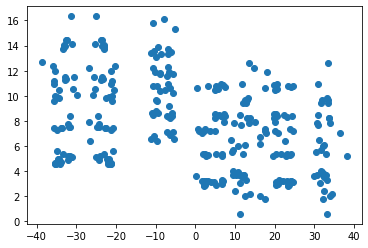

In [ ]:
X_comp=TSNE(n_components=1).fit_transform(X)
import matplotlib.pyplot as plt
plt.scatter(X_comp,y);

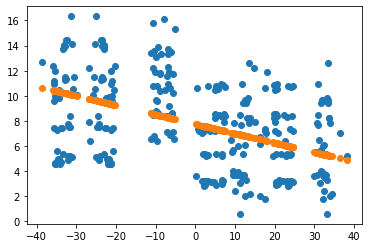

In [ ]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict)


# 끝 아님

In [18]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  1.3min finished


{'fit_time': array([19.07786608, 21.46923733, 15.37848091, 15.79028559, 14.74917078,
        13.71317244, 14.08145332, 11.59778118, 16.76653457, 12.38208699]),
 'score_time': array([0.02252531, 0.02206039, 0.02104187, 0.02078605, 0.02120352,
        0.02045345, 0.02133036, 0.02019835, 0.01576781, 0.02009559]),
 'test_score': array([ 0.98210634,  0.99773074,  0.99045286,  0.97461192,  0.9969334 ,
         0.99004441,  0.9553763 , -0.09169362,  0.80388634,  0.85876126])}

In [19]:
estimator=make_pipeline(StandardScaler(), SVR(C=1,epsilon=0.01, kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  1.4min finished


{'fit_time': array([17.23521805, 14.07692528, 15.29909968, 13.35158348, 16.02171612,
        19.5512948 , 17.32248235, 13.84812522, 20.34809232, 17.96328545]),
 'score_time': array([0.02466297, 0.02361274, 0.02406287, 0.02216005, 0.02389574,
        0.02293849, 0.02230215, 0.0436604 , 0.01843429, 0.02320194]),
 'test_score': array([ 0.98265026,  0.99756965,  0.98848107,  0.97420444,  0.99631763,
         0.98941102,  0.9558808 , -0.23128611,  0.8050847 ,  0.86593324])}

In [20]:
estimator=make_pipeline(StandardScaler(), SVR(C=1,epsilon=0.1, kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  1.2min finished


{'fit_time': array([13.94475007, 16.62571383, 15.37785864, 16.33008909, 15.33606935,
        13.73674607, 13.75228143, 11.09688544, 16.74355435, 12.3988328 ]),
 'score_time': array([0.0238688 , 0.02204537, 0.0610857 , 0.02008343, 0.02030349,
        0.02035332, 0.02421165, 0.02091241, 0.01574802, 0.02445006]),
 'test_score': array([ 0.98210634,  0.99773074,  0.99045286,  0.97461192,  0.9969334 ,
         0.99004441,  0.9553763 , -0.09169362,  0.80388634,  0.85876126])}

In [21]:
estimator=make_pipeline(StandardScaler(), SVR(C=1,epsilon=1, kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.5s finished


{'fit_time': array([1.68658614, 1.49428248, 1.45692778, 1.36790204, 1.68334723,
        1.52232957, 1.24370813, 1.06645465, 0.40015388, 0.62331152]),
 'score_time': array([0.00871801, 0.00792241, 0.00737619, 0.01020622, 0.01137686,
        0.00725412, 0.00837922, 0.00712991, 0.00528479, 0.00511813]),
 'test_score': array([ 0.97091301,  0.99553525,  0.96913532,  0.97161121,  0.99536396,
         0.98075792,  0.97919676, -0.39470302,  0.45604121,  0.89307196])}

In [22]:
estimator=make_pipeline(StandardScaler(), SVR(C=1,epsilon=0.005, kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  1.4min finished


{'fit_time': array([18.48724985, 13.83816838, 17.08170938, 16.35237765, 15.44149899,
        15.89272428, 19.70477557, 14.93776321, 20.51454592, 15.68735862]),
 'score_time': array([0.02339935, 0.02356744, 0.02308989, 0.02360225, 0.02396584,
        0.02363682, 0.02460384, 0.02280426, 0.02560902, 0.02291775]),
 'test_score': array([ 0.98270505,  0.99756301,  0.98846361,  0.97428529,  0.99629758,
         0.98938375,  0.95523591, -0.24316316,  0.80514125,  0.86661545])}

In [23]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.3s finished


{'fit_time': array([0.40124774, 0.3687582 , 0.35125208, 0.41643167, 0.36205554,
        0.37788224, 0.34844661, 0.37565088, 0.35169888, 0.33407521]),
 'score_time': array([0.06906295, 0.07453251, 0.07425451, 0.07995582, 0.08603477,
        0.08622503, 0.08067775, 0.07892823, 0.08222294, 0.036479  ]),
 'test_score': array([ 0.58372223,  0.80030434,  0.64029506,  0.69929918,  0.79042216,
         0.69831792,  0.42589322, -2.98063777, -1.63016745,  0.34199398])}

In [27]:
estimator=make_pipeline(StandardScaler(), SVR(C=1, epsilon=0.001,kernel='rbf'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.4s finished


{'fit_time': array([0.41491699, 0.38050437, 0.41196537, 0.37855101, 0.38986564,
        0.40060616, 0.37483454, 0.39576054, 0.36399031, 0.39347363]),
 'score_time': array([0.07490444, 0.08441138, 0.07723522, 0.07676196, 0.08187866,
        0.0864017 , 0.09170151, 0.07921028, 0.08522987, 0.04162288]),
 'test_score': array([ 0.59137793,  0.80033634,  0.63371537,  0.68778536,  0.7887152 ,
         0.69708412,  0.41190331, -2.92580489, -1.65380573,  0.34077406])}

In [24]:
estimator=make_pipeline(StandardScaler(), SVR(C=0.1, epsilon=0.1,kernel='rbf'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.5s finished


{'fit_time': array([0.47985697, 0.4694016 , 0.46938634, 0.44995546, 0.3857317 ,
        0.37992263, 0.3772819 , 0.4350884 , 0.35838842, 0.37098026]),
 'score_time': array([0.10007906, 0.09006   , 0.07520914, 0.07476807, 0.07559919,
        0.07356095, 0.08116865, 0.07671809, 0.0931747 , 0.04905319]),
 'test_score': array([-4.01652131e-01,  1.35608344e-01,  5.22057373e-02, -1.52579495e-01,
         1.65269956e-01,  1.49232249e-01, -2.50077563e+00, -1.94555281e+02,
        -1.59017867e+00,  3.55817679e-02])}

In [25]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='poly'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.2s finished


{'fit_time': array([0.39803958, 0.38766193, 0.41077232, 0.39438224, 0.41247463,
        0.4369278 , 0.36125493, 0.39182091, 0.34249806, 0.35377836]),
 'score_time': array([0.03574967, 0.03574228, 0.04410934, 0.03200912, 0.03830695,
        0.03781843, 0.05589199, 0.04047704, 0.03557086, 0.01822233]),
 'test_score': array([-2.07190231e-01,  3.73972782e-01,  2.32124228e-01, -1.32895450e-01,
         3.87063949e-01,  5.51756599e-01, -9.97755772e-02, -5.65712805e+01,
         2.85943145e-02,  2.10858563e-01])}

In [26]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='sigmoid'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.2s finished


{'fit_time': array([0.38246846, 0.39747286, 0.37853527, 0.40019178, 0.36525249,
        0.38333392, 0.37756848, 0.39775991, 0.37523675, 0.37786794]),
 'score_time': array([0.03862143, 0.03516388, 0.03956866, 0.03322625, 0.03839874,
        0.0352273 , 0.03838658, 0.03873301, 0.04018545, 0.02070451]),
 'test_score': array([  -0.52388426,    0.47625374,   -1.62319076,   -1.52770672,
           0.42477008,   -1.42287755,   -3.85844141, -369.97215685,
          -1.19530691,   -3.2636545 ])}

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=0.01, kernel='linear'))])

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=0.01, kernel='linear'))])

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.7523130233842064
평가 데이터 점수:0.7126604225342954


In [ ]:
# no start------------------------------

#당뇨병

In [ ]:
X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVR(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y);

In [ ]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict)


In [ ]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

In [ ]:
gs.best_estimator_

#당뇨병


In [ ]:
#no end ------------------------

In [ ]:
#X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVR(kernel='rbf')
model.fit(X_train,y_train)

SVR()

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.36347457856147947
평가 데이터 점수:0.28840860929878154


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


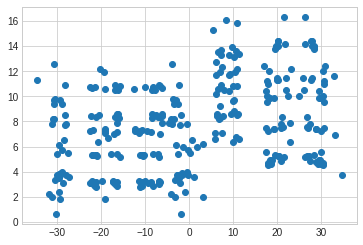

In [ ]:
X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y);

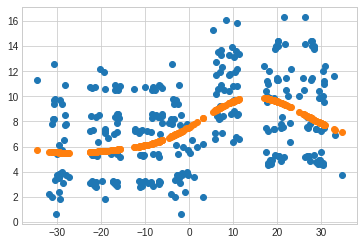

In [ ]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict)


In [ ]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    7.2s finished


{'fit_time': array([2.16882086, 2.17559576, 2.08235359, 2.15419555, 0.964679  ]),
 'score_time': array([0.77614141, 0.81867838, 0.74545097, 0.80946922, 0.38967323]),
 'test_score': array([-1.15944887, -0.87340122, -0.08337016, -0.97905145, -1.48757937])}

#RBF, POlynomial, Sigmoid RBF--Best

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__kernel':['rbf','polynomial', 'sigmoid']}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.3634745785614796
평가 데이터 점수:0.2884086092987814


#RBF

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01))])

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01))])

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.02625742476922166
평가 데이터 점수:0.014188933178353902


#sigmoid

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='sigmoid'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:-0.007698766626828446
평가 데이터 점수:-0.00580195584963783


#Polynomial

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='sigmoid'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:-0.007698766626828446
평가 데이터 점수:-0.00580195584963783


In [ ]:
#no start---------------------------------------

# 이후는 분류기 문제임 
#linear SVC
#유방암 

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#붓꽃

In [ ]:
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#와인

In [ ]:
X,y=load_wine(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#붓꽃

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__kernel':['rbf','polynomial', 'sigmoid']}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

In [ ]:
gs.best_estimator_

#유방암

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#붓꽃

In [ ]:
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#와인

In [ ]:
X,y=load_wine(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#end

In [ ]:
#no end-----------------------------------